In [0]:
# E-greedy -> Decaying E-greedy 
# add random noise
# Discounted Reward 

In [0]:
import random as rd
import numpy as np
import tensorflow as tf
import gym
from gym.envs.registration import register
import matplotlib.pyplot as plt

In [0]:
def rargmax(vector):
  m = np.max(vector)
  indices = np.zeros(vector == m)[0]
  return rd.choice(indices)

In [0]:
register(
  id = 'FrozenLake-v3',
  entry_point = "gym.envs.toy_text:FrozenLakeEnv",
  kwargs = {'map_name': '4x4',
            'is_slippery': False}
)

env = gym.make('FrozenLake-v3')

# Initialization table
Q = np.zeros([env.observation_space.n, env.action_space.n])
discount = 0.9
num_episodes = 2000

Succes rate: 0.943
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


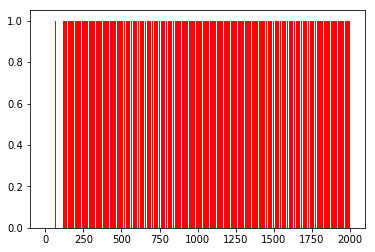

In [0]:
rList = []
for step in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False
  
  while not done:
    action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (step + 1))
    new_state, reward, done, _ = env.step(action)
  
    Q[state, action] = reward + discount * np.max(Q[new_state, :])
    
    rAll += reward
    state = new_state
  rList.append(rAll)

print("Succes rate: {}".format(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

plt.bar(range(len(rList)), rList, color='red')
plt.show()

Succes rate: 0.805
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.       0.6561   0.59049 ]
 [0.59049  0.729    0.59049  0.6561  ]
 [0.6561   0.       0.59049  0.59049 ]
 [0.59049  0.6561   0.       0.531441]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.6561  ]
 [0.       0.       0.       0.      ]
 [0.6561   0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.      ]
 [0.729    0.9      0.       0.729   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.9      0.729   ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]


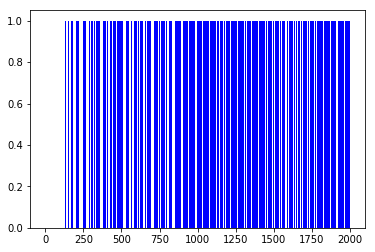

In [0]:
# E-greedy

rList = []
for step in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False
  
  e = 1. / ((step // 100) + 1)
  
  while not done:
    # Choose an action by e greedy
    if np.random.rand(1) < e:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (step + 1))
      
    new_state, reward, done, _ = env.step(action)
  
    Q[state, action] = reward + discount * np.max(Q[new_state, :])
    
    rAll += reward
    state = new_state
  rList.append(rAll)
  
print("Succes rate: {}".format(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

plt.bar(range(len(rList)), rList, color='blue')
plt.show()

Succes rate: 0.8205
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.       0.6561   0.59049 ]
 [0.59049  0.729    0.59049  0.6561  ]
 [0.6561   0.       0.59049  0.59049 ]
 [0.59049  0.6561   0.       0.531441]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.6561  ]
 [0.       0.       0.       0.      ]
 [0.6561   0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.      ]
 [0.729    0.9      0.       0.729   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.9      0.729   ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]


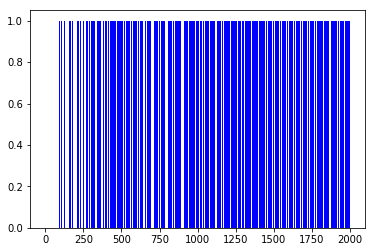

In [12]:
# E-greedy

rList = []
learning_rate = 0.85

for step in range(num_episodes):
  state = env.reset()
  rAll = 0
  done = False
  
  e = 1. / ((step // 100) + 1)
  
  while not done:
    # Choose an action by e greedy
    if np.random.rand(1) < e:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (step + 1))
      
    new_state, reward, done, _ = env.step(action)
  
    Q[state, action] *= 1-learning_rate
    Q[state, action] += learning_rate * (reward + discount * np.max(Q[new_state, :]))
    
    rAll += reward
    state = new_state
  rList.append(rAll)
  
print("Succes rate: {}".format(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

plt.bar(range(len(rList)), rList, color='blue')
plt.show()